In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\saive\Downloads\Unemployment in India.csv")

In [4]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
data.shape

(768, 7)

In [7]:
data.columns=["State","date","Frequency","Estimated Unemployement rate","Estimated employed","Estimated labour partician rate","region"]

In [8]:
data.tail()


,State,date,Frequency,Estimated Unemployement rate,Estimated employed,Estimated labour partician rate,region
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.isnull().sum()

State                              28
date                               28
Frequency                          28
Estimated Unemployement rate       28
Estimated employed                 28
Estimated labour partician rate    28
region                             28
dtype: int64

In [10]:
data= data.drop_duplicates()

In [11]:
data.duplicated().any()

np.False_

In [12]:
data.State.value_counts()

State
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [13]:
data['date']=pd.to_datetime(data['date'],dayfirst=True)

In [14]:
data['month_int']=data['date'].dt.month
data.head()

,State,date,Frequency,Estimated Unemployement rate,Estimated employed,Estimated labour partician rate,region,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0


In [15]:
import calendar

# Convert to int (handling NaNs if any)
data['month'] = data['month_int'].apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else None)
data.head()

,State,date,Frequency,Estimated Unemployement rate,Estimated employed,Estimated labour partician rate,region,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,Sep


In [16]:
IND = data.groupby("month")[[
    'Estimated Unemployement rate',
    'Estimated employed',
    'Estimated labour partician rate'
]].mean()
IND=pd.DataFrame(IND).reset_index()


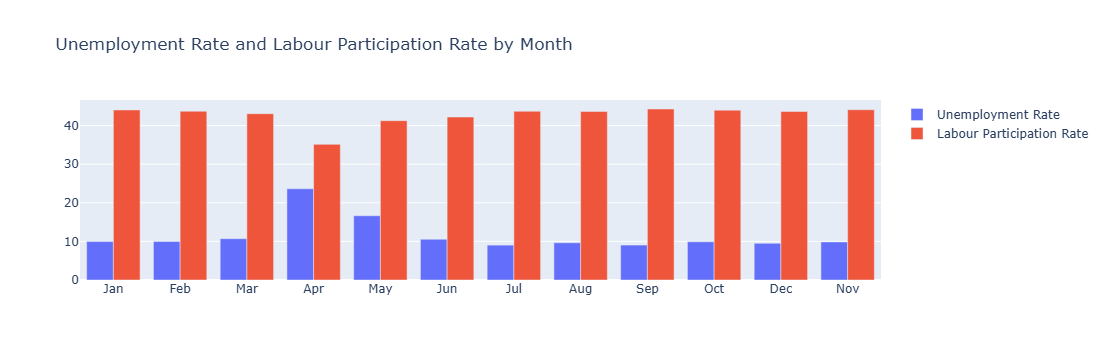

In [17]:
import plotly.graph_objects as go

# Use exact column names from IND
month = IND["month"]
unemployment_rate = IND["Estimated Unemployement rate"]
labour_participation_rate = IND["Estimated labour partician rate"]

# Create bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name="Unemployment Rate"))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name="Labour Participation Rate"))

# Fix month order (if needed)
fig.update_layout(
    title="Unemployment Rate and Labour Participation Rate by Month",
    xaxis={"categoryorder": "array","categoryarray": ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct"]})
fig.show()


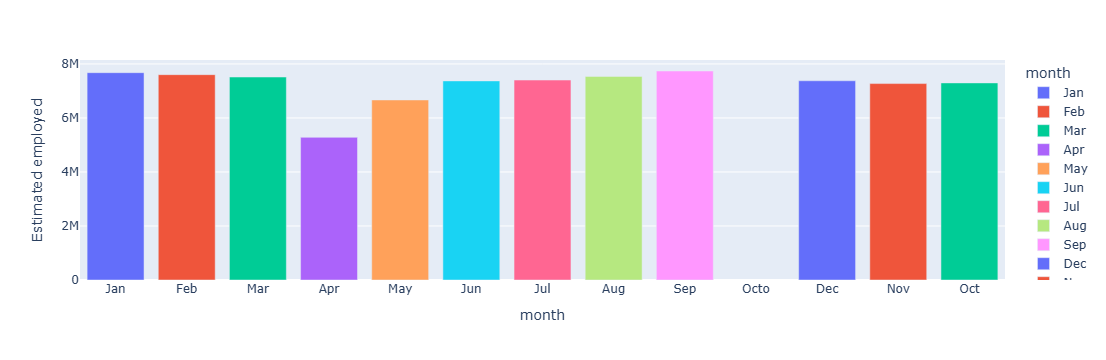

In [123]:
fig=px.bar(IND,x='month',y='Estimated employed',color='month',category_orders={"month":["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Octo"]})
fig.show()

In [18]:
State=data.groupby(["State"])[["Estimated Unemployement rate","Estimated employed","Estimated labour partician rate"]].mean()
State=pd.DataFrame(State).reset_index()

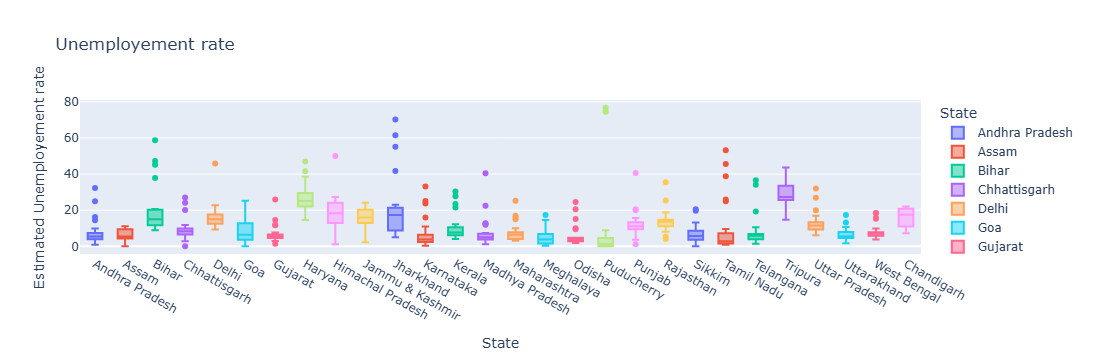

In [125]:
fig=px.box(data,x='State',y='Estimated Unemployement rate',color='State',title='Unemployement rate')
fig.show()

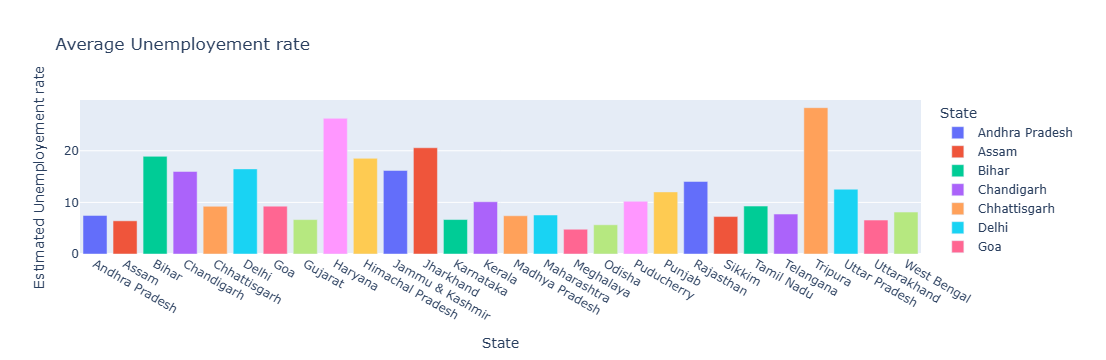

In [126]:
fig=px.bar(State,x='State',y='Estimated Unemployement rate',color="State",title=' Average Unemployement rate')
fig.show()

In [19]:
data.region.unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [20]:
region=data.groupby(["region"])[['Estimated Unemployement rate',"Estimated employed","Estimated labour partician rate"]].mean()
region=pd.DataFrame(region).reset_index()

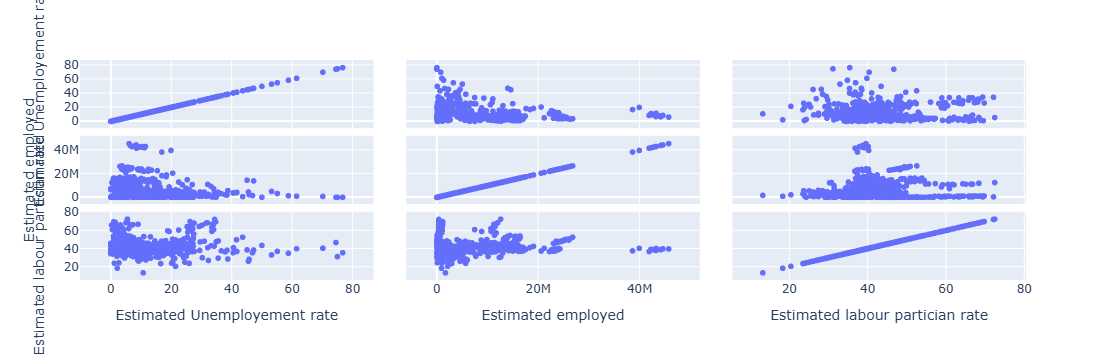

In [23]:
import plotly.express as px
fig=px.scatter_matrix(data,dimensions=['Estimated Unemployement rate',"Estimated employed","Estimated labour partician rate"])
fig.show()

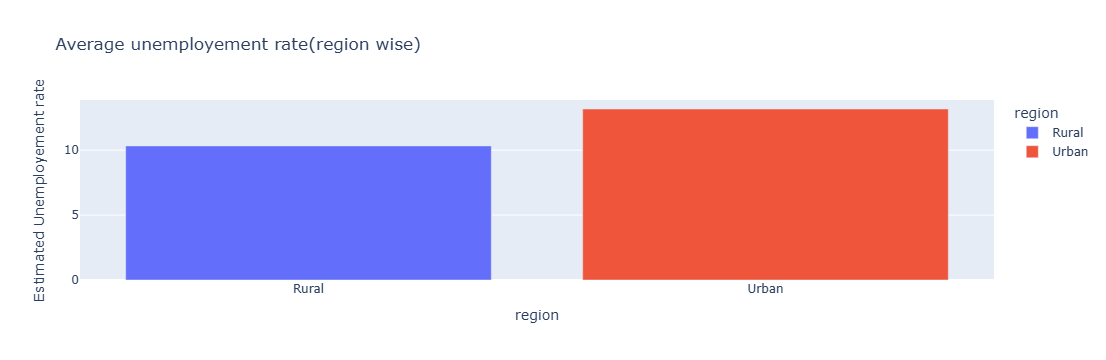

In [24]:
fig=px.bar(region,x='region',y='Estimated Unemployement rate',color='region',title='Average unemployement rate(region wise)')
fig.show()

In [25]:
Unemployement=data.groupby(['region','State'])['Estimated Unemployement rate'].mean().reset_index()
Unemployement.head()

,region,State,Estimated Unemployement rate
0,Rural,Andhra Pradesh,5.526429
1,Rural,Assam,4.490833
2,Rural,Bihar,16.770000
3,Rural,Chhattisgarh,6.628571
4,Rural,Delhi,15.258571


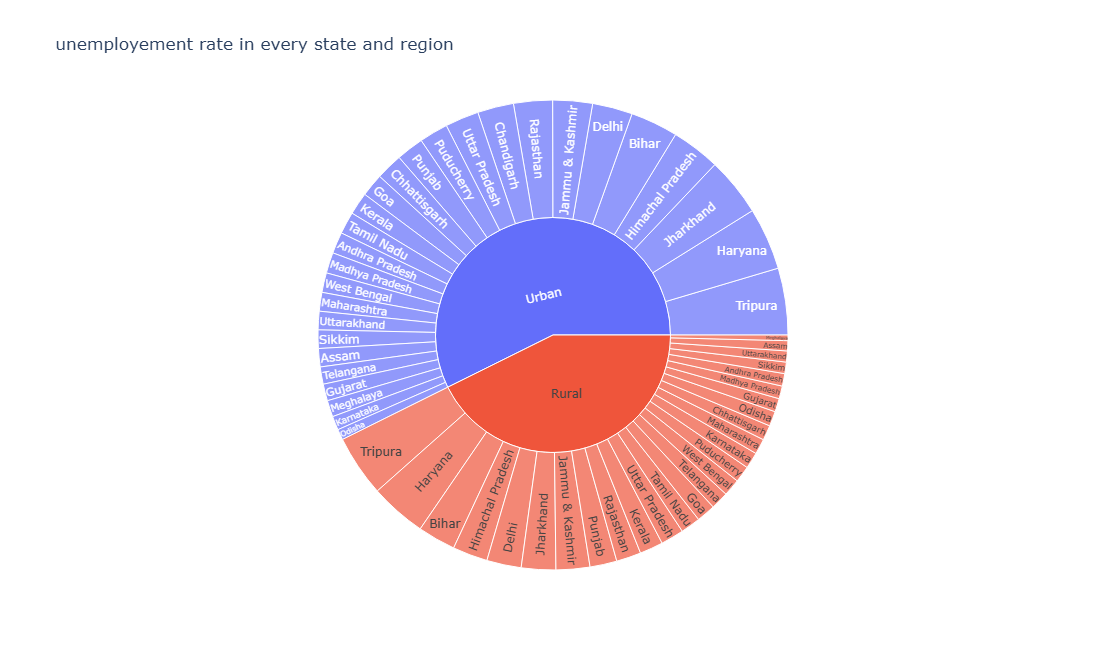

In [26]:
fig=px.sunburst(Unemployement,path=['region','State'],values='Estimated Unemployement rate',title='unemployement rate in every state and region',height=650)
fig.show()
               